## CLASE 4: REDES NEURONALES CON KERAS

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

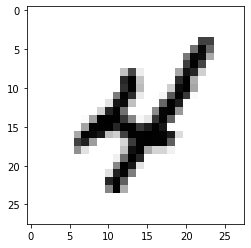

In [5]:
plt.imshow(x_train[9], cmap=plt.cm.binary)

In [6]:
y_train[9]

4

In [8]:
# Normalizar los datos entre 0 y 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255


In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [12]:
y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Crear el modelo:
model = Sequential()
model.add(Dense(10, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8781 - accuracy: 0.5110
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2742 - accuracy: 0.7457
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9344 - accuracy: 0.8210
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7460 - accuracy: 0.8509
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6326 - accuracy: 0.8677


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5748 - accuracy: 0.8806


In [17]:
predictions = model.predict(x_test)

In [18]:
predictions.shape

(10000, 10)

In [32]:
i=34

In [33]:
print(predictions[i])

[0.01585614 0.00470321 0.04071664 0.0267869  0.00809778 0.02569335
 0.00412926 0.80310565 0.03119603 0.03971506]


In [34]:
np.argmax(predictions[i])

7

In [35]:
y_test[i]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

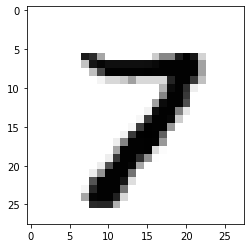

In [36]:
plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary);